In [4]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
balancedf = pd.read_csv('../stc-ds_2020-02/15_linear_regression/data/balance.csv', sep=',')
balancedf.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


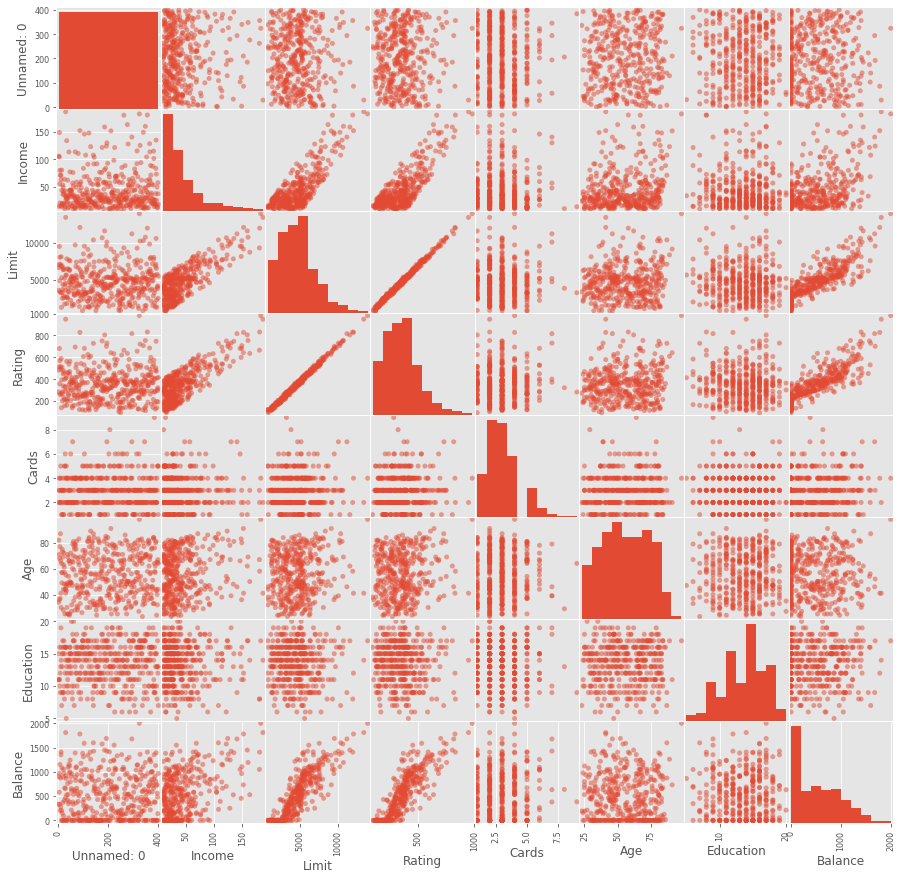

In [6]:
scatter_matrix(balancedf, figsize=(15, 15), s=100)
plt.show()

Text(0.5, 1.0, 'Insect Wing Sizes at Various Latitudes')

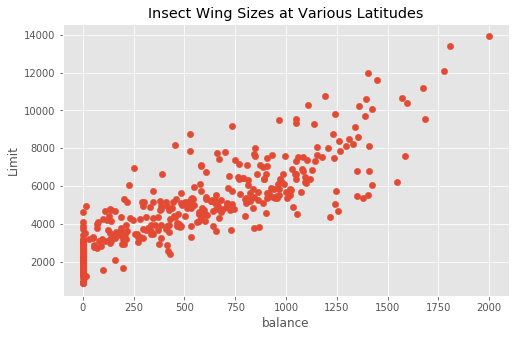

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(balancedf.Balance, balancedf.Limit, s=40)
ax.set_xlabel("balance")
ax.set_ylabel("Limit")
ax.set_title("Insect Wing Sizes at Various Latitudes")

In [8]:
balancedf["Gender"].replace({" Male": 1, "Female": 0}, inplace=True)
balancedf["Married"].replace({"Yes": 1, "No": 0}, inplace=True)
balancedf["Student"].replace({"Yes": 1, "No": 0}, inplace=True)

In [9]:
balancedf

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,1,0,1,Caucasian,333
1,2,106.025,6645,483,3,82,15,0,1,1,Asian,903
2,3,104.593,7075,514,4,71,11,1,0,0,Asian,580
3,4,148.924,9504,681,3,36,11,0,0,0,Asian,964
4,5,55.882,4897,357,2,68,16,1,0,1,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,1,0,1,Caucasian,560
396,397,13.364,3838,296,5,65,17,1,0,0,African American,480
397,398,57.872,4171,321,5,67,12,0,0,1,Caucasian,138
398,399,37.728,2525,192,1,44,13,1,0,1,Caucasian,0


In [10]:
balancedf.groupby('Ethnicity').count()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
Ethnicity,,,,,,,,,,,
African American,99,99,99,99,99,99,99,99,99,99,99
Asian,102,102,102,102,102,102,102,102,102,102,102
Caucasian,199,199,199,199,199,199,199,199,199,199,199


In [12]:
Ethnicity = ['Asian', 'Caucasian']
balancedf[ ['Asian', 'Caucasian'] ] = pd.get_dummies(Ethnicity)


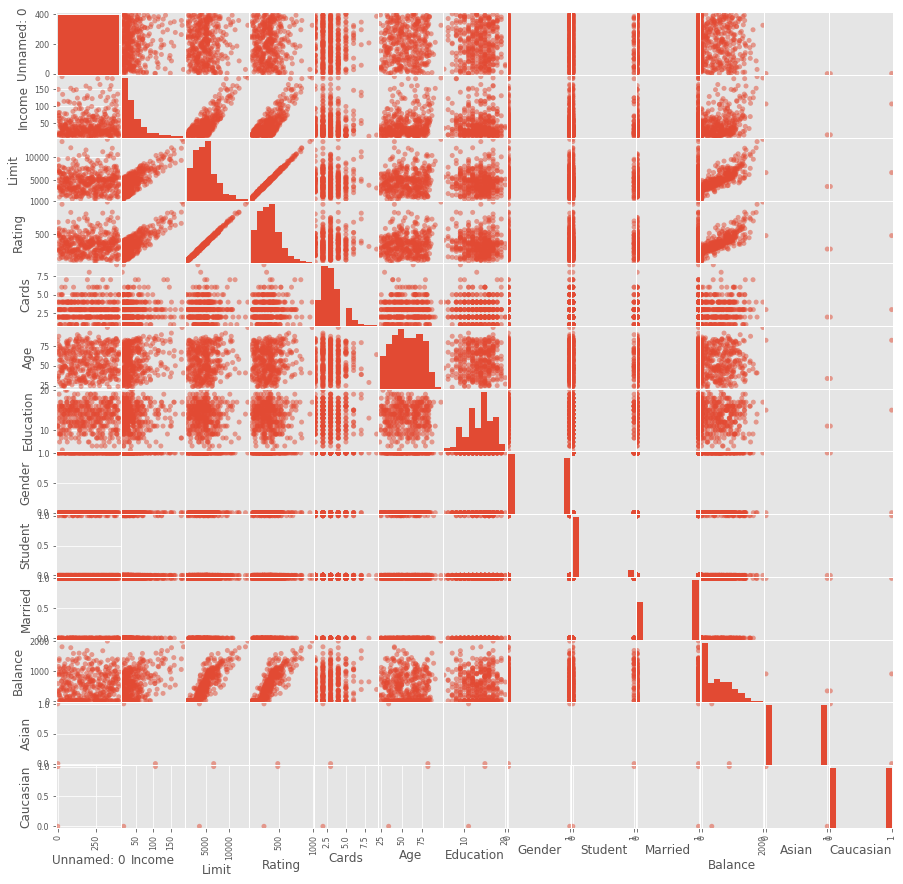

In [13]:
scatter_matrix(balancedf, figsize=(15, 15), s=100)
plt.show()

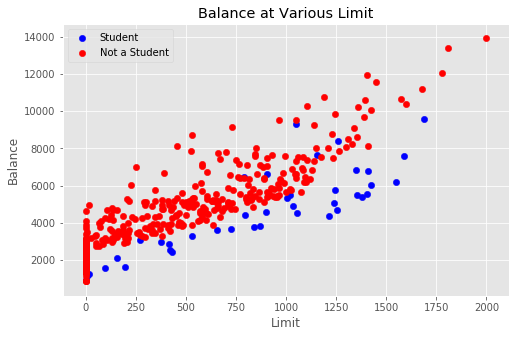

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))

def make_balance_scatter_plot(ax):
    sex_boolean = balancedf..astype(bool)
    ax.scatter(balancedf.Balance[sex_boolean], 
               balancedf.Limit[sex_boolean],
               s=40, c="blue", label="Student")
    ax.scatter(balancedf.Balance[~sex_boolean], 
               balancedf.Limit[~sex_boolean],
               s=40, c="red", label="Not a Student")
    ax.set_xlabel("Limit")
    ax.set_ylabel("Balance")
    ax.set_title("Balance at Various Limit")
    ax.legend()
    
make_balance_scatter_plot(ax)

In [18]:
linear_model = LinearRegression()
linear_model.fit(balancedf[['Balance']], balancedf['Limit'])

print('Intercept a:', linear_model.intercept_)
print('Coefficient b:', linear_model.coef_)

Intercept a: 2485.9565945182767
Coefficient b: [4.32611253]


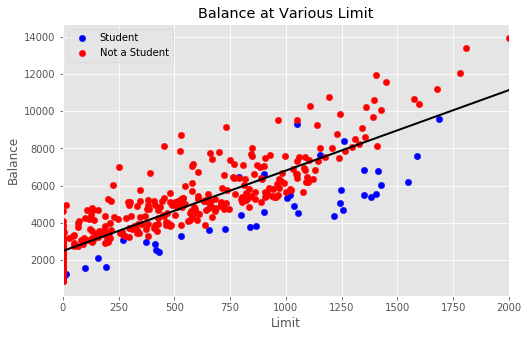

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))

make_balance_scatter_plot(ax)

# Make a line graph of the predictions.
def make_balance_model_line(ax, label="Linear Regression"):
    x = np.linspace(0, 2000, num=250)
    ax.plot(x, linear_model.intercept_ + linear_model.coef_[0] * x,
           linewidth=2, c="black", label=label)
    ax.set_xlim(0, 2000)

make_balance_model_line(ax)

In [20]:
balance_model_with_Student = LinearRegression()
balance_model_with_Student.fit(balancedf[['Limit', 'Student']], balancedf['Balance'])
print('Intercept beta_0:', balance_model_with_Student.intercept_)
print('Coefficients beta_1, beta_2:', balance_model_with_Student.coef_)

Intercept beta_0: -334.72993724696266
Coefficients beta_1, beta_2: [1.71953833e-01 4.04403644e+02]


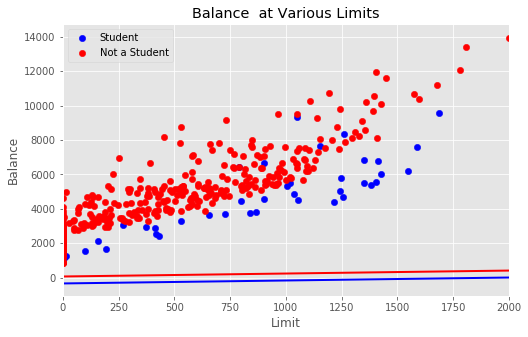

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))

make_balance_scatter_plot(ax)

def make_balance_model_lines(ax):
    x = np.linspace(0, 2000, num=250)
    ax.plot(x, balance_model_with_Student.intercept_ 
                 + balance_model_with_Student.coef_[0] * x,
           linewidth=2, c="blue")
    ax.plot(x, balance_model_with_Student.intercept_ 
                 + balance_model_with_Student.coef_[0] * x + balance_model_with_Student.coef_[1],
           linewidth=2, c="red")
    ax.set_xlim(0, 2000)
    ax.set_xlabel("Limit")
    ax.set_ylabel("Balance")
    ax.set_title("Balance  at Various Limits")
    ax.legend()
    
make_balance_model_lines(ax)

In [22]:
balancedf['Limit_sq'] = balancedf['Limit'] ** 2
balance_model_quad = LinearRegression()
balance_model_quad = balance_model_quad.fit(
    balancedf[['Limit','Limit_sq', 'Student']], balancedf['Balance']) 

print('Intercept a:', balance_model_quad.intercept_)
print('Coefficients b, c, d:', balance_model_quad.coef_)

Intercept a: -441.7185987733993
Coefficients b, c, d: [ 2.18550896e-01 -4.08954492e-06  4.02094637e+02]


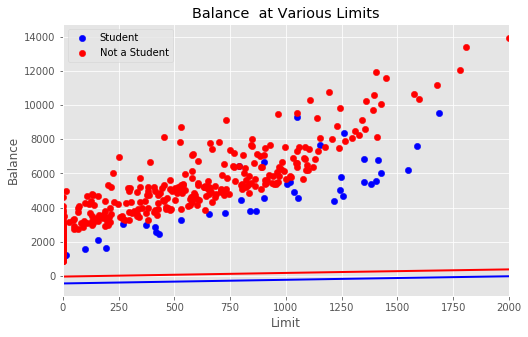

In [23]:
fig, ax = plt.subplots(figsize=(8, 5))

# Make a scatterplot of the data.
make_balance_scatter_plot(ax)

def make_balance_model_quadratic(ax):
    x = np.linspace(0, 2000, num=250)
    ax.plot(x, balance_model_quad.intercept_ 
                 + balance_model_quad.coef_[0] * x
                 + balance_model_quad.coef_[1] * x*x,
           linewidth=2, c="blue")
    ax.plot(x, balance_model_quad.intercept_ 
                 + balance_model_quad.coef_[0] * x
                 + balance_model_quad.coef_[1] * x*x
                 + balance_model_quad.coef_[2],
           linewidth=2, c="red")
    ax.set_xlim(0, 2000)
    ax.set_xlabel("Limit")
    ax.set_ylabel("Balance")
    ax.set_title("Balance  at Various Limits")
    ax.legend()
    
make_balance_model_quadratic(ax)

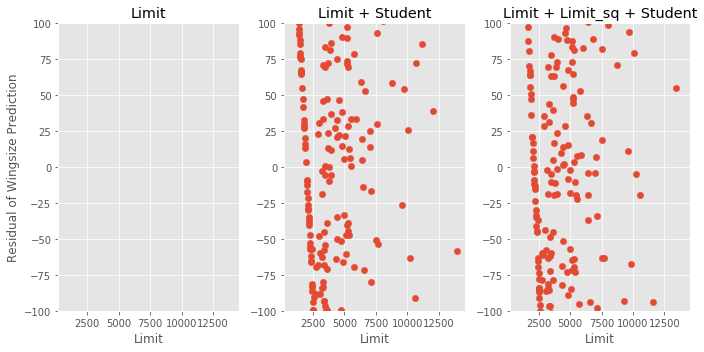

In [24]:
fig, axes = plt.subplots(1, 3, figsize = (10, 5))

preds = [linear_model.predict(balancedf[['Limit']]),
         balance_model_with_Student.predict(balancedf[['Limit', 'Student']]),
         balance_model_quad.predict(balancedf[['Limit','Limit_sq', 'Student']])]
labels = ['Limit', 'Limit + Student', 'Limit + Limit_sq + Student']

for i, (pred, label) in enumerate(zip(preds, labels)):
    axes[i].scatter(balancedf['Limit'], balancedf['Balance'] - pred,
                    s=40)
    axes[i].set_title(label)
    axes[i].set_xlabel('Limit')
    axes[i].set_ylim(-100, 100)

axes[0].set_ylabel('Residual of Wingsize Prediction');
fig.tight_layout()